In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/divyakhairnar/Documents/MS_ITA/Fall24/Data-Driven-Knowledge/Project/data.csv', parse_dates=True, na_values={'price': 0,'bedrooms': 0,})

In [2]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.551000e+03,4598.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.579059e+05,3.402349,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.639299e+05,0.906273,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,7.800000e+03,1.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4551 non-null   float64
 2   bedrooms       4598 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [5]:
num_rows, num_columns = df.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 4600
Number of Columns: 18


In [6]:
df.isna().sum()

date              0
price            49
bedrooms          2
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.shape

(4549, 18)

In [9]:
from scipy.stats import zscore

df['price_zscore'] = zscore(df['price'])
df['sqft_living_zscre'] = zscore(df['sqft_living'])
df['sqft_lot_zscre'] = zscore(df['sqft_lot'])
df['sqft_above_zscre'] = zscore(df['sqft_above'])
df['sqft_basement_zscre'] = zscore(df['sqft_basement'])

df = df[(df.price_zscore < 3) & (df.price_zscore > -3)]
df = df[(df.sqft_living_zscre < 3) & (df.sqft_living_zscre > -3)]
df = df[(df.sqft_lot_zscre < 3) & (df.sqft_lot_zscre > -3)]
df = df[(df.sqft_above_zscre < 3) & (df.sqft_above_zscre > -3)]
df = df[(df.sqft_basement_zscre < 3) & (df.sqft_basement_zscre > -3)]

df.drop(columns=['price_zscore','sqft_living_zscre','sqft_lot_zscre','sqft_above_zscre','sqft_basement_zscre'], inplace=True)


In [10]:
df.shape

(4361, 18)

In [11]:
df.drop(columns=["country", "statezip","street",'date','city'], inplace=True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994


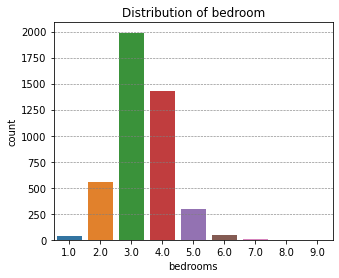

In [13]:
import matplotlib.pyplot  as plt
import seaborn as sns
%matplotlib inline
# Univariate analysis
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="grey",linestyle="--",linewidth=0.6)
plt.title('Distribution of bedroom')
plt.style.use("ggplot")
plt.show()

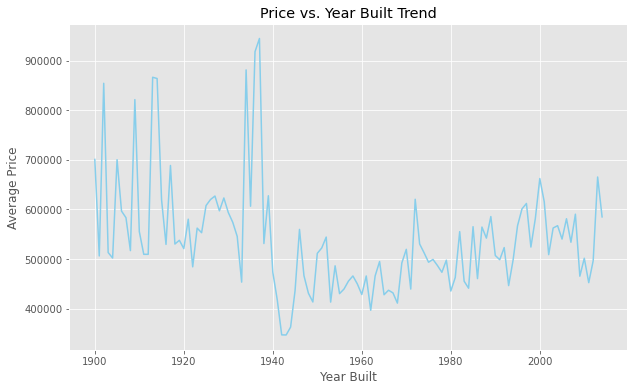

In [14]:
# Set a smaller figure size
plt.figure(figsize=(10, 6))

# Group the data by year built and calculate the average price for each year
average_prices_by_year = df.groupby('yr_built')['price'].mean().reset_index()

# Price vs. Year Built Trend
sns.lineplot(data=average_prices_by_year, x='yr_built', y='price', color='skyblue')
plt.title('Price vs. Year Built Trend')
plt.xlabel('Year Built')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

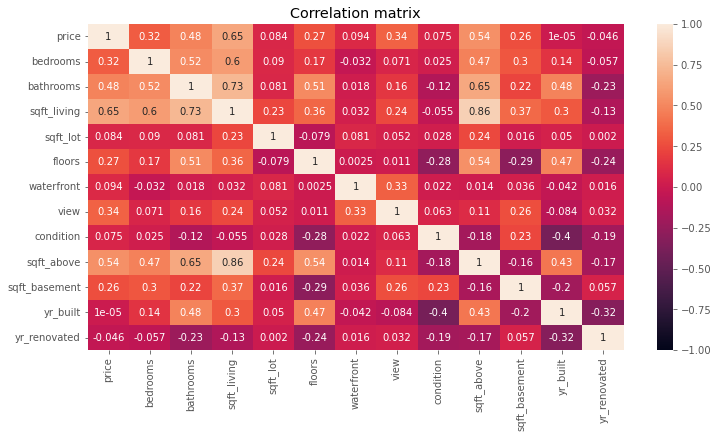

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.title('Correlation matrix')
plt.show()

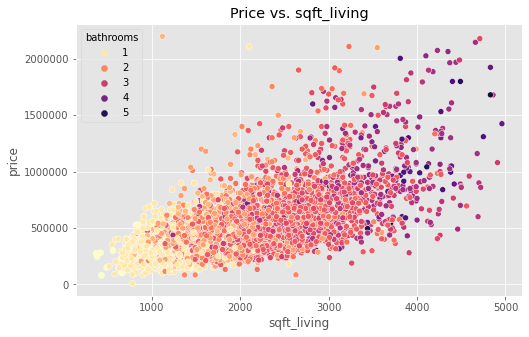

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, y="price", x="sqft_living", hue="bathrooms", palette='magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.title('Price vs. sqft_living')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.iloc[:,1:].values
y = df.iloc[:,0].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#scaling
sc_X = StandardScaler()
X_train[:, 0:5] = sc_X.fit_transform(X_train[:, 0:5])
X_test[:, 0:5] = sc_X.transform(X_test[:, 0:5])
X_train[:, 6:11] = sc_X.fit_transform(X_train[:, 6:11])
X_test[:, 6:11] = sc_X.transform(X_test[:, 6:11])

sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.reshape(-1,1)).flatten()

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Update the model with the best parameters
rf_model.set_params(**best_params)

# Fit the model on the training data with the best parameters
rf_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate MSE for training and testing
mse_train_rf = mean_squared_error(y_train, y_train_pred)
mse_test_rf = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing
r2_train_rf = r2_score(y_train, y_train_pred)
r2_test_rf = r2_score(y_test, y_test_pred)

# Display the results
print("Best Hyperparameters:", best_params)
print("Training MSE:", mse_train_rf)
print("Testing MSE:", mse_test_rf)
print("Training R-squared:", r2_train_rf)
print("Testing R-squared:", r2_test_rf)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training MSE: 0.2823964664172747
Testing MSE: 361327190856.5932
Training R-squared: 0.7176035335827253
Testing R-squared: -3.185622748925497


In [19]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

# Calculate MSE for training and testing
mse_train_knn = mean_squared_error(y_train, y_train_pred_knn)
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)

# Calculate R-squared for training and testing
r2_train_knn = r2_score(y_train, y_train_pred_knn)
r2_test_knn = r2_score(y_test, y_test_pred_knn)

# Display the results for KNN
print("KNN Training MSE:", mse_train_knn)
print("KNN Testing MSE:", mse_test_knn)
print("KNN Training R-squared:", r2_train_knn)
print("KNN Testing R-squared:", r2_test_knn)


KNN Training MSE: 0.3932155438587945
KNN Testing MSE: 361327270573.69525
KNN Training R-squared: 0.6067844561412055
KNN Testing R-squared: -3.1856236723702978


In [20]:
import xgboost as xgb

# Convert the data to DMatrix format, which is required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # for regression tasks
    'max_depth': 6,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse'  # Root Mean Squared Error
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predictions on training and testing data
y_train_pred_xgb = xgb_model.predict(dtrain)
y_test_pred_xgb = xgb_model.predict(dtest)

# Convert the predictions back to original scale (if needed)
y_train_pred_xgb_original = sc_y.inverse_transform(y_train_pred_xgb.reshape(-1, 1)).flatten()
y_test_pred_xgb_original = sc_y.inverse_transform(y_test_pred_xgb.reshape(-1, 1)).flatten()

# Calculate MSE for training and testing
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb_original)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb_original)

# Calculate R-squared for training and testing
r2_train_xgb = r2_score(y_train, y_train_pred_xgb_original)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb_original)

# Display the results for XGBoost
print("XGBoost Training MSE:", mse_train_xgb)
print("XGBoost Testing MSE:", mse_test_xgb)
print("XGBoost Training R-squared:", r2_train_xgb)
print("XGBoost Testing R-squared:", r2_test_xgb)

XGBoost Training MSE: 322779585129.0511
XGBoost Testing MSE: 37337889834.24302
XGBoost Training R-squared: -322779585128.0511
XGBoost Testing R-squared: 0.5674769985713354


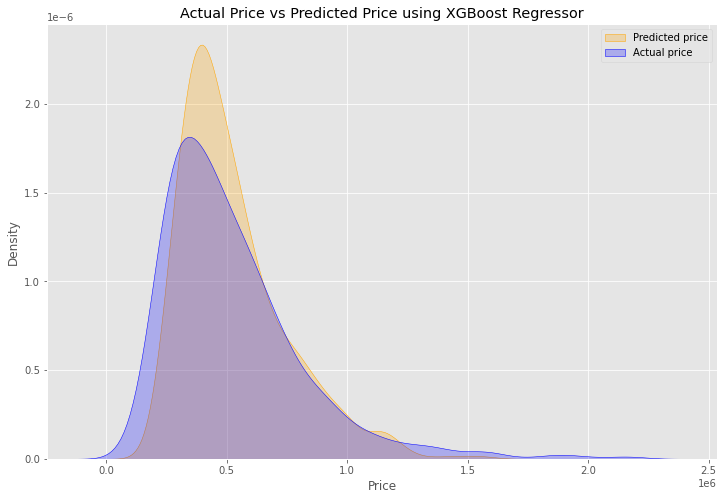

In [21]:
# Create KDE plot for XGBoost predicted prices
plt.figure(figsize=(12, 8))

# Reshape y_test_pred_xgb to a 2D array
y_test_pred_xgb_reshaped = y_test_pred_xgb_original.reshape(-1, 1)

# KDE plot for predicted prices
sns.kdeplot(x=y_test_pred_xgb_reshaped.flatten(), color="orange", label="Predicted price", fill=True)

# KDE plot for actual prices
sns.kdeplot(x=y_test, color="blue", label="Actual price", fill=True)

plt.title('Actual Price vs Predicted Price using XGBoost Regressor')
plt.legend(["Predicted price", "Actual price"])
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Predictions on training and testing data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate MSE for training and testing
mse_train_dt = mean_squared_error(y_train, y_train_pred)
mse_test_dt = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing
r2_train_dt = r2_score(y_train, y_train_pred)
r2_test_dt = r2_score(y_test, y_test_pred)


# Display the results
print("Training MSE:", mse_train_dt)
print("Testing MSE:", mse_test_dt)
print("Training R-squared:", r2_train_dt)
print("Testing R-squared:", r2_test_dt)

Training MSE: 1.0191855696898663e-05
Testing MSE: 361327208026.5187
Training R-squared: 0.999989808144303
Testing R-squared: -3.1856229478223206


In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

g_model = GradientBoostingRegressor(random_state=42)
g_model.fit(X_train,y_train)

# Predictions on training and testing data
y_train_pred = g_model.predict(X_train)
y_test_pred = g_model.predict(X_test)

# Calculate MSE for training and testing
mse_train_gb = mean_squared_error(y_train, y_train_pred)
mse_test_gb = mean_squared_error(y_test, y_test_pred)

# Calculate R-squared for training and testing
r2_train_gb = r2_score(y_train, y_train_pred)
r2_test_gb = r2_score(y_test, y_test_pred)


# Display the results
print("Training MSE:", mse_train_gb)
print("Testing MSE:", mse_test_gb)
print("Training R-squared:", r2_train_gb)
print("Testing R-squared:", r2_test_gb)

Training MSE: 0.34813445355281725
Testing MSE: 361327178704.34265
Training R-squared: 0.6518655464471828
Testing R-squared: -3.1856226081535386


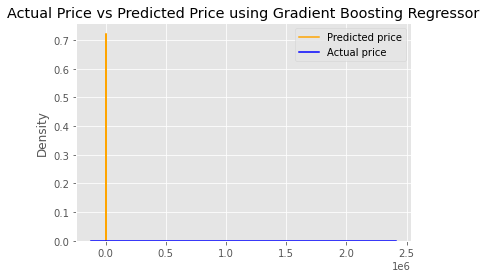

In [24]:
sns.kdeplot(x=y_test_pred,color="orange",label="Prdicted price")
sns.kdeplot(x=y_test,color="blue",label="Actual price")
plt.title('Actual Price vs Predicted Price using Gradient Boosting Regressor')
plt.legend(["Predicted price","Actual price"])
plt.show()

In [27]:
models = pd.DataFrame({
    'Model': [
        'Random Forest Regressor', 'K-Neighbors Regressor', 'XGBoost', 
        'Decision Tree Regressor', 'Gradient Boosting Regressor'
    ],
    'Training R2 Score': [
        r2_train_rf,r2_train_knn,r2_train_xgb,r2_train_dt,r2_train_gb
    ],
    'Training Mean Square Error': [
       mse_train_rf,mse_train_knn,mse_train_xgb,mse_train_dt,mse_train_gb
    ],
    'Testing R2 Score': [
        r2_test_rf,r2_test_knn,r2_test_xgb,r2_test_dt,r2_test_gb
    ],
    'Testing Mean Square Error': [
       mse_test_rf,mse_test_knn,mse_test_xgb,mse_test_dt,mse_test_gb
    ]
})

In [28]:
models

,Model,Training R2 Score,Training Mean Square Error,Testing R2 Score,Testing Mean Square Error
0,Random Forest Regressor,7.176035e-01,2.823965e-01,-3.185623,3.613272e+11
1,K-Neighbors Regressor,6.067845e-01,3.932155e-01,-3.185624,3.613273e+11
2,XGBoost,-3.227796e+11,3.227796e+11,0.567477,3.733789e+10
3,Decision Tree Regressor,9.999898e-01,1.019186e-05,-3.185623,3.613272e+11
4,Gradient Boosting Regressor,6.518655e-01,3.481345e-01,-3.185623,3.613272e+11
